### Principal Component Analysis (PCA, 주성분 분석)

- 앞서 확인한 과일 이미지 데이터의 경우 100x100 총 10,000개의 픽셀값을 독립변수(X)로 사용해 분석해보았다. 즉, 과일 이미지 데이터에는 10,000개의 특성이 존재하는데 이러한 특성을 차원(dimension)이라고 한다. 이미지 데이터라는 특수한 경우에 이 차원이 굉장히 큰 것 일수도 있지만 빅데이터 시대인 만큼 앞으로 우리가 다룰 데이터는 현재보다 많은 특성을 가질 가능성이 크다. 물론 과거와는 다르게 큰 용량을 저장할 수도 있고, 큰 용량의 데이터를 빠르게 처리할 수 있기 때문에 저장공간, 데이터 처리 속도의 문제 때문에 굳이 차원 축소(dimensionality reduction)를 해야 하는지에 대해 의문을 가져볼 수 있다. 하지만, 특성이 매우 많은 경우 과적합의 문제, 복잡한 해석의 문제 등이 남아있기 때문에 데이터를 가장 잘 나타내는 일부 특성만을 선택해 모형을 훈련시키는 것은 효율적인 방법이 될 수 있다.

- 주성분 분석(PCA)은 데이터를 잘 설명하는 변수를 찾는 방법이다. 그렇다면 데이터를 잘 설명한 다는 기준을 생각해 보아야 한다. 이때 기준으로 생각해 볼 수 있는 지표는 분산(variance)이다. 분산은 자료가 퍼진 정도를 살펴볼 수 있는 산포의 측도(Measures of Dispersion)인데 어떤 특성값의 퍼진 정도가 크다는 것은 그만큼 관측 대상(observation)이 해당 특성에 대해 다양하게 나타난다는 것을 의미한다. 이는 우리가 목표로 하는 종속변수(Y)값이나 비슷한(거리가 가까운) 관측 대상끼리 분류할 경우 핵심적인 역할을 할 수 있는 특성일 가능성이 크다.

In [1]:
from IPython.display import Image

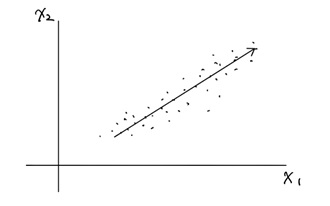

In [2]:
Image("C:/Users/com/Desktop/ML/Lecture_08/Lecture_08_figure_01.jpg")

- 위의 그림에는 $x_{1}$과 $x_{2}$ 두 가지 특성이 있다. 이때 화살표 방향이 가장 넓게 퍼진 형태를 띄고 있다. 즉, 화살표 방향이 분산이 가장 크다고 볼 수 있다. 이 데이터를 중심으로 갖도록 축을 이동하면 아래 그림과 같다.

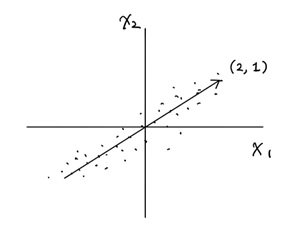

In [3]:
Image("C:/Users/com/Desktop/ML/Lecture_08/Lecture_08_figure_02.jpg")

- 화살표 방향을 벡터로 표현하면 위 그림의 (2, 1)과 같이 표현할 수 있는데 이와 같이 분산이 가장 큰 방향을 나타내는 벡터를 주성분(principal component)라고 한다.

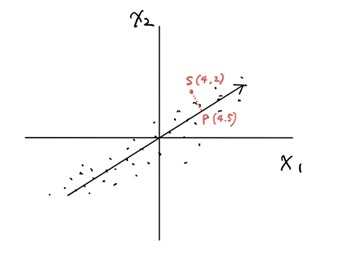

In [4]:
Image("C:/Users/com/Desktop/ML/Lecture_08/Lecture_08_figure_03.jpg")

- 주성분 벡터를 축으로 데이터를 사영(projection)시키면 원래 $x_{1}$, $x_{2}$의 좌표계에서 (4, 2)의 값을 같는 데이터는 주성분 축에서는 4.5의 값을 같게 된다. 이 값이 전체 데이터를 가장 잘 설명하는 방향에서의 해당 관측 대상의 위치가 된다. 이와같이 PCA는 2개의 특성에서 데이터를 잘 설명하는 1개의 특성으로 차원을 축소시켜준다.

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [7]:
fruits = np.load('C:/Users/com/Desktop/ML/Lecture_08/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components = 50)
pca.fit(fruits_2d)
fruits_2d_pca_components = pca.components_
print(fruits_2d_pca_components.shape)

(50, 10000)


In [10]:
def draw_fruits(arr, ratio = 1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 +j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap = 'gray')
            axs[i, j].axis('off')
    plt.show()

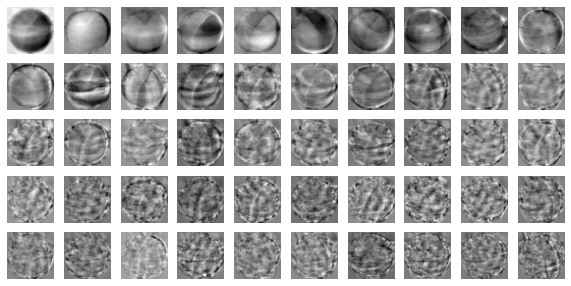

In [11]:
draw_fruits(fruits_2d_pca_components.reshape(-1, 100, 100))

- 위 그림은 50개의 주성분을 나타낸 것이다. 이 주성분을 통해 원본 데이터의 차원을 50으로 줄일 수 있다.

In [12]:
fruits_2d_pca_50 = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_2d_pca_50.shape)

(300, 10000)
(300, 50)


- 10,000개의 특성을 50개로 줄였을 때 생각해 볼 수 있는 점은 데이터 손실이다. 다행히 데이터를 가장 잘 설명하는 방향으로 특성을 줄여놓은 것이기 때문에 원본을 상당부분 재구성할 수 있다. 아래는 주성분이 원본 데이터를 얼마나 잘 나타내는지를 확인할 수 있는 설명된 분산(explained variance)이다.

In [13]:
print(pca.explained_variance_ratio_)

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511202
 0.00486383 0.00480347 0.0044783  0.00437319 0.0040804  0.00389479
 0.00372446 0.00359277 0.00331451 0.00317847 0.00304324 0.00303729
 0.00288883 0.00275885 0.00264893 0.00255876 0.00251927 0.00247026
 0.00239553 0.00230614 0.0022201  0.00216837 0.00213607 0.00196584
 0.00193186 0.00189686 0.00185562 0.00182777 0.0017436  0.00169526
 0.00162472 0.00158978]


In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.9215800867622449


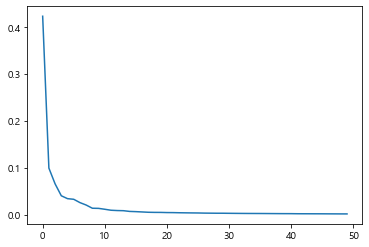

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 확인한 바와 같이 50개의 특성으로 축소시킨 데이터가 원본 데이터의 약 92%를 설명할 수 있기 때문에 데이터의 크기를 무려 $\frac{1}{200}$로 줄였음에도 상당부분 원본 데이터의 정보를 가지고 있다고 볼 수 있다. 축소시킨 데이터를 통해 이미지를 복원시켜보면 아래와 같다.

In [16]:
fruits_inverse = pca.inverse_transform(fruits_2d_pca_50)
print(fruits_inverse.shape)

(300, 10000)


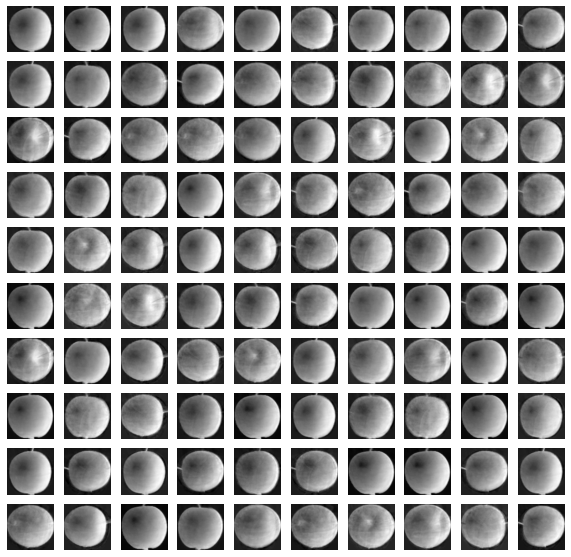

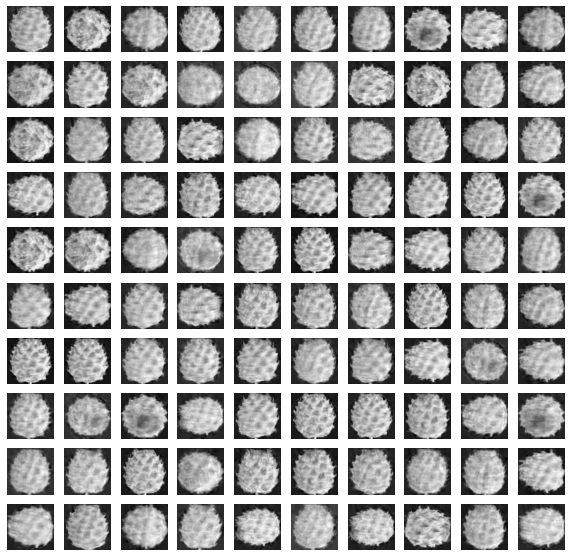

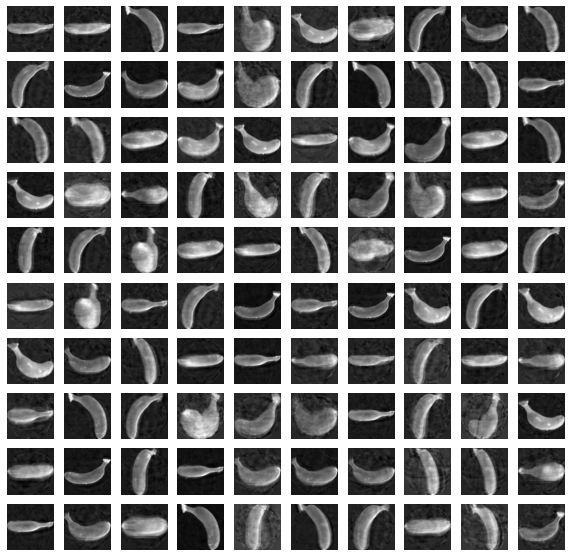

In [17]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])

- 차원이 축소된 데이터를 K-Means에 적용한 경우 어떤 결과가 나오는지 확인해보자.

In [18]:
fruits_2d_pca_50

array([[-2778.41779458, -1571.87380958, -1335.33773974, ...,
          -16.59666887,    20.94683789,   100.24599463],
       [-3078.27365136, -2739.27040987,  -636.18337262, ...,
          114.22717808,  -180.12696742,   -18.099396  ],
       [-2620.61072939, -1486.87055257, -1471.33777759, ...,
           29.22007821,   -28.42617229,    88.30998645],
       ...,
       [ 5182.12868263,   121.76051589,  2777.28503167, ...,
         -610.50070694,  -145.47504779,    41.21420993],
       [ 3987.98800619,   -70.88160826, -2925.55235345, ...,
          248.86536496,    63.94497307,  -477.80710532],
       [ 5823.86570618, -1276.9886677 ,   162.05804414, ...,
         -458.57345714,   365.93625121,  -431.78979953]])

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

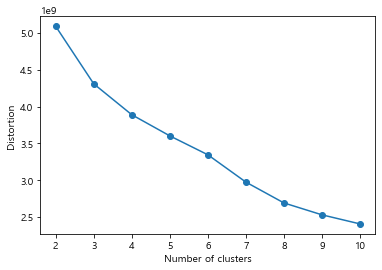

In [20]:
# 엘보 방법
distortions = []

for i in range(2,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(fruits_2d_pca_50) # 모형 훈련
    distortions.append(kmeans_i.inertia_)
    
plt.plot(range(2,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

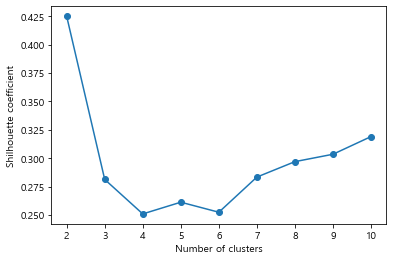

In [21]:
# 실루엣 계수
silhouette = []

for i in range(2,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(fruits_2d_pca_50) # 모형 훈련
    silhouette_values = silhouette_score(fruits_2d_pca_50, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,11), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

In [22]:
kmeans_fruits = KMeans(n_clusters = 3, random_state = 0)
kmeans_fruits.fit(fruits_2d_pca_50)
print(kmeans_fruits.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [23]:
print(np.unique(kmeans_fruits.labels_, return_counts = True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


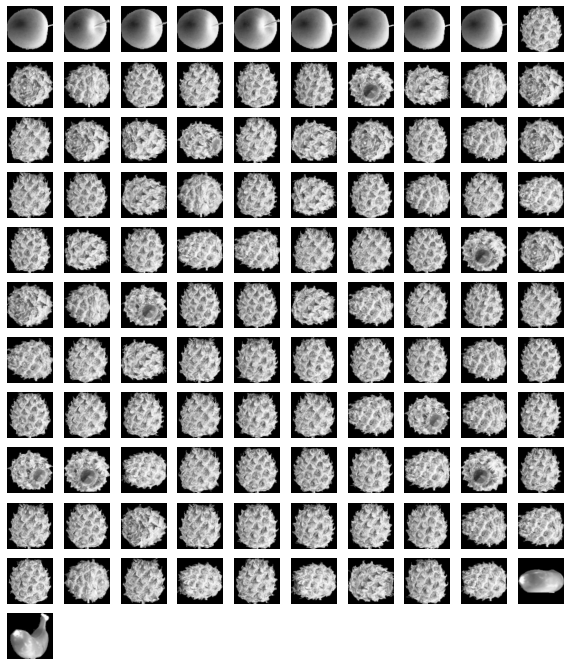

In [24]:
# label = 0
draw_fruits(fruits[kmeans_fruits.labels_ == 0])

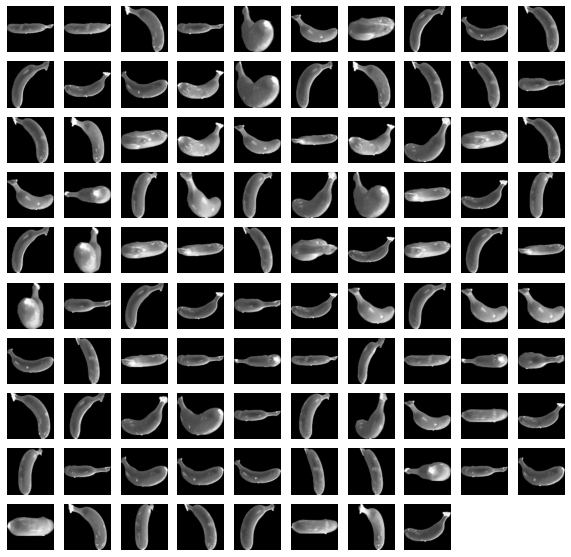

In [25]:
# label = 1
draw_fruits(fruits[kmeans_fruits.labels_ == 1])

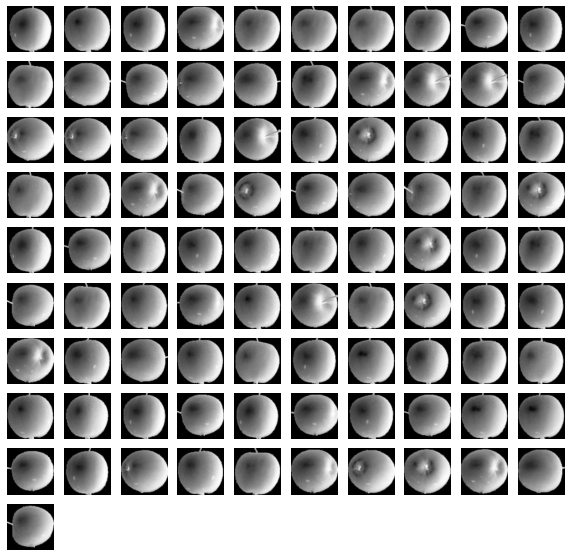

In [26]:
# label = 2
draw_fruits(fruits[kmeans_fruits.labels_ == 2])

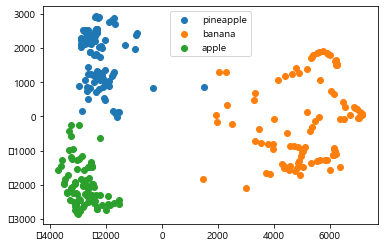

In [27]:
for label in range(0, 3):
    data = fruits_2d_pca_50[kmeans_fruits.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()